Training MSE: 0.0004
Testing MSE: 0.0028


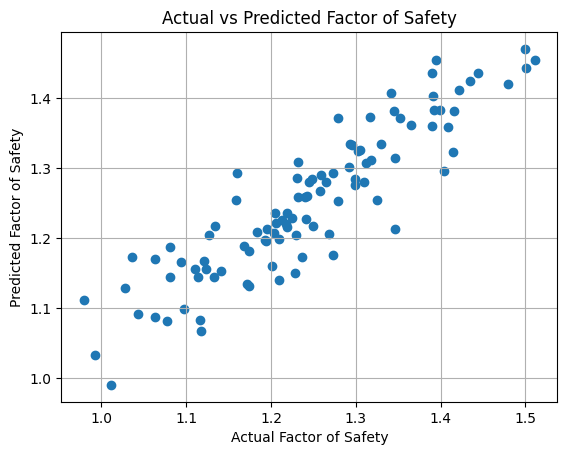

Predicted Factor of Safety for the new slope: 1.2597


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Step 0: Regret your life decisions and cry silently in a room corner

# Step 1: Load or Generate Dataset
# Sample dataset generation (for demonstration purposes)
# H: Height of slope, beta: slope angle, c: cohesion, phi: friction angle, gamma: unit weight, FoS: factor of safety
np.random.seed(42)
n_samples = 500
H = np.random.uniform(5, 50, n_samples)  # Height of the slope
beta = np.random.uniform(15, 45, n_samples)  # Slope angle
c = np.random.uniform(10, 60, n_samples)  # Cohesion
phi = np.random.uniform(25, 40, n_samples)  # Friction angle
gamma = np.random.uniform(18, 25, n_samples)  # Unit weight of soil

# Simplified relation to generate FoS for demonstration
FoS = 1.5 - 0.01 * beta + 0.002 * c - 0.005 * H + 0.003 * phi + np.random.normal(0, 0.05, n_samples)

# Pandas DataFrame
data = pd.DataFrame({
    'H': H,
    'beta': beta,
    'c': c,
    'phi': phi,
    'gamma': gamma,
    'FoS': FoS
})

# Step 2: Dataset spliting into training and testing sets
X = data[['H', 'beta', 'c', 'phi', 'gamma']]
y = data['FoS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 5: Model Evaluations
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Training MSE: {mse_train:.4f}')
print(f'Testing MSE: {mse_test:.4f}')

# Results
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Actual vs Predicted Factor of Safety')
plt.grid(True)
plt.show()

# Step 7: Example Prediction
new_slope = np.array([[30, 25, 45, 35, 20]])  # Example slope parameters
predicted_fos = model.predict(new_slope)
print(f'Predicted Factor of Safety for the new slope: {predicted_fos[0]:.4f}')
